# Part A - Visualization and Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\riche\Desktop\CX BA I Take Home - Ship Data - Take Home - Ship Data.xlsx')

In [3]:
df.head(10)

,name,sex,age,class,went_excursion,sibling_spouse,parent_child
0,"Allen, Miss. Elisabeth Walton",female,29.0000,1,1,0,0
1,"Allison, Master. Hudson Trevor",male,0.9167,1,1,1,2
2,"Allison, Miss. Helen Loraine",female,2.0000,1,0,1,2
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,0,1,2
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",male,25.0000,1,0,1,2
5,"Anderson, Mr. Harry",male,48.0000,1,1,0,0
6,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,1,1,0
7,"Andrews, Mr. Thomas Jr",male,39.0000,1,0,0,0
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,1,1,2,0
9,"Artagaveytia, Mr. Ramon",male,71.0000,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1309 non-null   object 
 1   sex             1309 non-null   object 
 2   age             1046 non-null   float64
 3   class           1309 non-null   int64  
 4   went_excursion  1309 non-null   int64  
 5   sibling_spouse  1309 non-null   int64  
 6   parent_child    1309 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 71.7+ KB


***Part A Question 1) Describe three trends or relationships you noticed after exploring the data.***

### First Relationship: Number of Passengers who went on Excursions by Class

In [6]:
# Checking count of each class
df['class'].value_counts()

3    709
1    323
2    277
Name: class, dtype: int64

***Above shows 1st Class = 323 Passengers, 2nd Class = 277 Passengers, 3rd Class = 709 Passengers***

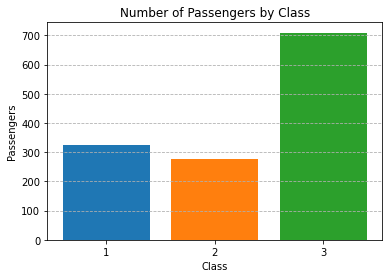

In [10]:
# Visualizing Number of Passengers by Class
X_class = ['1', '2', '3']
Y_class = [323, 277, 709]

plt.title('Number of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Passengers')
plt.bar(X_class, Y_class, color = ['tab:blue', 'tab:orange', 'tab:green'])
plt.grid(axis = 'y', linestyle = '--')

In [11]:
# Checking count of passengers who went on excursions vs did not go.
df['went_excursion'].value_counts()

0    809
1    500
Name: went_excursion, dtype: int64

***Above shows 809 passengers did not go on excursions while 500 did***

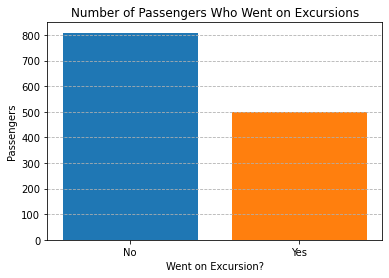

In [12]:
# Visualizing Number of Passengers by Excursion
X_excursion = ['No', 'Yes']
Y_excursion = [809, 500]

plt.title('Number of Passengers Who Went on Excursions')
plt.xlabel('Went on Excursion?')
plt.ylabel('Passengers')
plt.bar(X_excursion, Y_excursion, color = ['tab:blue', 'tab:orange'])
plt.grid(axis = 'y', linestyle = '--')

In [13]:
# Creating new dataframe with just passengers' class and excursion info.
df2 = df[['class', 'went_excursion']]
df2

,class,went_excursion
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0
...,...,...
1304,3,0
1305,3,0
1306,3,0
1307,3,0


In [14]:
# Checking count of passengers for each class and whether or not they went on excursions.
df2.value_counts().sort_index(ascending = True)

class  went_excursion
1      0                 123
       1                 200
2      0                 158
       1                 119
3      0                 528
       1                 181
dtype: int64

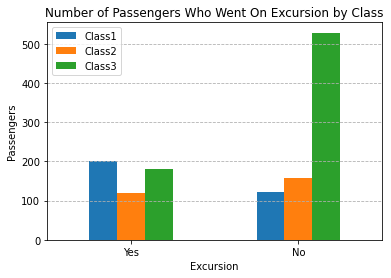

In [15]:
# Visualizing Number of Passengers who went on Excursion by Class.
data = {'Excursion': ['Yes', 'No'], 'Class1': [200, 123], 'Class2': [119, 158], 'Class3': [181, 528] }
df3 = pd.DataFrame(data)
df3.set_index('Excursion').plot.bar(rot = 0)
plt.title('Number of Passengers Who Went On Excursion by Class')
plt.ylabel('Passengers')
plt.grid(axis = 'y', linestyle = '--')


### Second Relationship: Number of Passengers with Parents/Children Based on Class

In [17]:
# Checking count of passengers by class.
df['class'].value_counts()

3    709
1    323
2    277
Name: class, dtype: int64

***Above shows 1st Class = 323 Passengers, 2nd Class = 277 Passengers, 3rd Class = 709 Passengers***

In [19]:
# Checking count of passengers by parent and children.
df['parent_child'].value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parent_child, dtype: int64

***Above shows 1002 passengers did not board with parents/children, 170 passengers boarded with 1 parent/child, 113 passengers boarded with 2 parents/children, and etc.***

In [20]:
# Creating new dataframe with just passengers' class and parent/child info.
df_class_parent_child = df[['class', 'parent_child']]

In [21]:
df_class_parent_child.value_counts().sort_index(ascending = True)

class  parent_child
1      0               242
       1                50
       2                27
       3                 2
       4                 2
2      0               206
       1                43
       2                25
       3                 3
3      0               554
       1                77
       2                61
       3                 3
       4                 4
       5                 6
       6                 2
       9                 2
dtype: int64

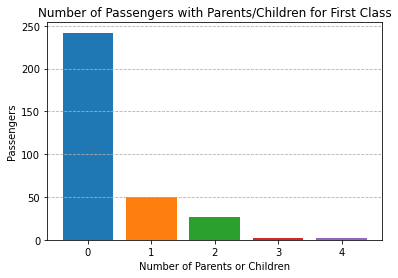

In [22]:
# Visualizing First Class Passengers and their Parent/Child info.
X1 = [0, 1, 2, 3, 4]
Y1 = [242, 50, 27, 2, 2]
plt.bar(X1, Y1, color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.title('Number of Passengers with Parents/Children for First Class')
plt.xlabel('Number of Parents or Children')
plt.ylabel('Passengers')
plt.grid(axis = 'y', linestyle = '--')

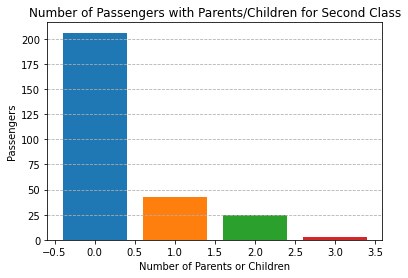

In [23]:
# Visualizing Second Class Passengers and their Parent/Child info.
X2 = [0, 1, 2, 3]
Y2 = [206, 43, 25, 3]
plt.bar(X2, Y2, color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.title('Number of Passengers with Parents/Children for Second Class')
plt.xlabel('Number of Parents or Children')
plt.ylabel('Passengers')
plt.grid(axis = 'y', linestyle = '--')

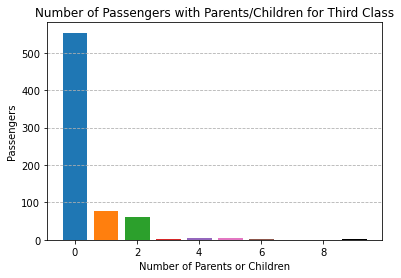

In [24]:
# Visualizing Third Class Passengers and their Parent/Child info.
X3 = [0, 1, 2, 3, 4, 5, 6, 9]
Y3 = [554, 77, 61, 3, 4, 6, 2, 2]
plt.bar(X3, Y3, color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:pink', 'tab:brown', 'black'])
plt.title('Number of Passengers with Parents/Children for Third Class')
plt.xlabel('Number of Parents or Children')
plt.ylabel('Passengers')
plt.grid(axis = 'y', linestyle = '--')

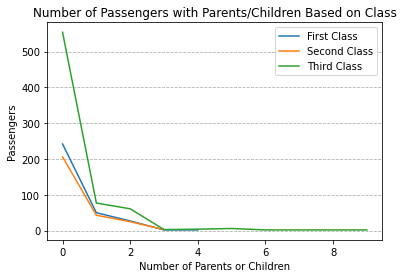

In [26]:
# Visualizing All Class Passengers and their Parent/Child info via line chart. 
plt.title('Number of Passengers with Parents/Children Based on Class')
plt.xlabel('Number of Parents or Children')
plt.ylabel('Passengers')
plt.plot(X1, Y1, c='tab:blue', label='First Class')
plt.plot(X2, Y2, c='tab:orange', label='Second Class')
plt.plot(X3, Y3, c='tab:green', label="Third Class")
plt.grid(axis = 'y', linestyle = '--')
plt.legend()

### Third Relationship: Age of Passengers on Class

Text(0.5, 1.0, "Histogram of Passengers' Ages")

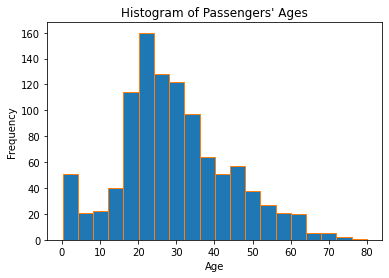

In [27]:
# Histogram of all Passengers' Ages
plt.hist(df['age'], bins=20, color='tab:blue', edgecolor='tab:orange')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Histogram of Passengers' Ages")

In [28]:
df['age'].mean()

29.8811345124283

In [29]:
df['age'].median()

28.0

In [30]:
df['age'].mode()

0    24.0
dtype: float64

In [31]:
df['age'].min()

0.1667

In [32]:
df['age'].max()

80.0

***Above shows minimum age of all passengers = 0.1667, max = 80, average = 29.88, median = 28, and mode = 24***

In [34]:
# Checking count of each age.
df['age'].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.6667      1
20.5000     1
23.5000     1
24.5000     1
60.5000     1
Name: age, Length: 98, dtype: int64

In [35]:
# Checking count of each class.
df['class'].value_counts()

3    709
1    323
2    277
Name: class, dtype: int64

In [36]:
# Creating new dataframe with just passengers' age and class info.
Age_Class = df[['class', 'age']]

In [37]:
Age_Class

,class,age
0,1,29.0000
1,1,0.9167
2,1,2.0000
3,1,30.0000
4,1,25.0000
...,...,...
1304,3,14.5000
1305,3,NaN
1306,3,26.5000
1307,3,27.0000


In [38]:
Age_Class.value_counts().sort_index(ascending = True)

class  age    
1      0.9167     1
       2.0000     1
       4.0000     1
       6.0000     1
       11.0000    1
                 ..
3      61.0000    1
       63.0000    1
       65.0000    1
       70.5000    1
       74.0000    1
Length: 209, dtype: int64

[Text(0.5, 1.0, 'Boxplot of Ages Based on Class')]

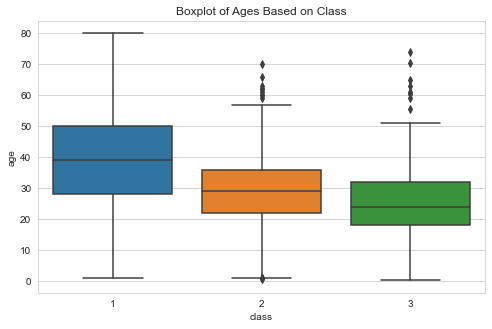

In [41]:
# Visualizing boxplot of all passengers' ages.
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')
s = sns.boxplot(x=df['class'], y=df['age'])
s.set(title='Boxplot of Ages Based on Class')

<AxesSubplot:title={'center':"Histogram of First Class Passengers' Age"}, xlabel='age', ylabel='Count'>

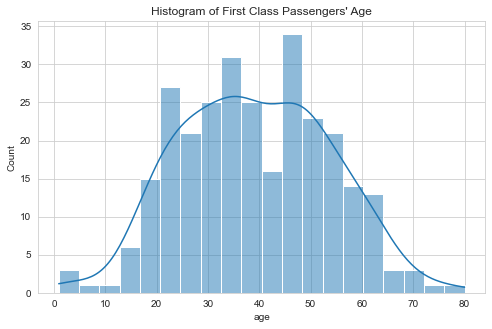

In [42]:
# Histogram of First Class Passengers' Ages with Kernal Density Estimate (KDE) line.

fig, ax = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')
ax.set_title("Histogram of First Class Passengers' Age")

df_hist_1 = df['age'][df['class'] == 1]
sns.histplot(df_hist_1, kde=True, bins=20, color='tab:blue')

<AxesSubplot:title={'center':"Histogram of Second Class Passengers' Age"}, xlabel='age', ylabel='Count'>

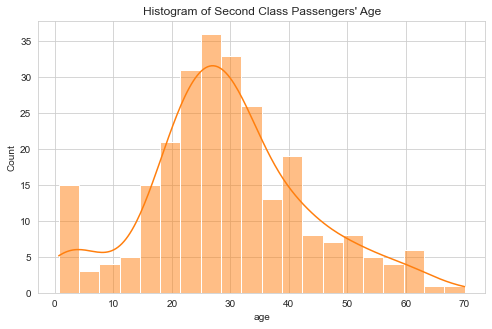

In [43]:
# Histogram of Second Class Passengers' Ages with Kernal Density Estimate (KDE) line.

fig, ax = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')
ax.set_title("Histogram of Second Class Passengers' Age")

df_hist_2 = df['age'][df['class'] == 2]
sns.histplot(df_hist_2, kde=True, bins=20, color='tab:orange')

<AxesSubplot:title={'center':"Histogram of Third Class Passengers' Age"}, xlabel='age', ylabel='Count'>

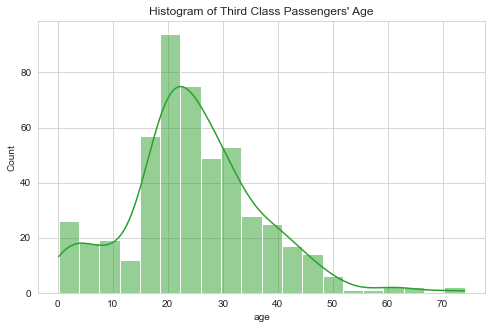

In [44]:
# Histogram of Third Class Passengers' Ages with  Kernal Density Estimate (KDE) line.

fig, ax = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')
ax.set_title("Histogram of Third Class Passengers' Age")

df_hist_3 = df['age'][df['class'] == 3]
sns.histplot(df_hist_3, kde=True, bins=20, color='tab:green')

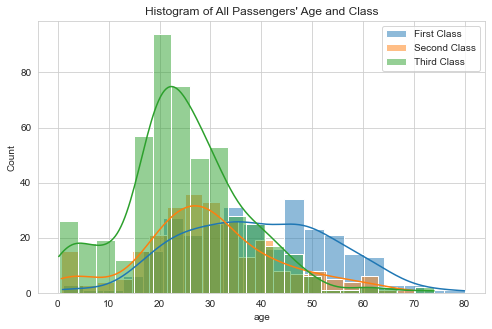

In [45]:
# Visualizing all classes' Histogram and KDE line.
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')
ax.set_title("Histogram of All Passengers' Age and Class")

sns.histplot(df_hist_1, kde=True, bins=20, color='tab:blue', label='First Class')
sns.histplot(df_hist_2, kde=True, bins=20, color='tab:orange', label='Second Class')
sns.histplot(df_hist_3, kde=True, bins=20, color='tab:green', label='Third Class')

plt.legend()